# KNN Algorithm

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
%matplotlib inline

In [3]:
df = pd.read_csv('./KNN_Project_Data.csv')
df.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


## Data has quite big ranges, Needs Standardisation

In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
scalar = StandardScaler()

In [8]:
scalar.fit(df.drop('TARGET CLASS', axis=1))

StandardScaler()

In [9]:
scaled_features = scalar.transform(df.drop('TARGET CLASS', axis=1))
scaled_features

array([[ 1.56852168, -0.44343461,  1.61980773, ..., -0.93279392,
         1.00831307, -1.06962723],
       [-0.11237594, -1.05657361,  1.7419175 , ..., -0.46186435,
         0.25832069, -1.04154625],
       [ 0.66064691, -0.43698145,  0.77579285, ...,  1.14929806,
         2.1847836 ,  0.34281129],
       ...,
       [-0.35889496, -0.97901454,  0.83771499, ..., -1.51472604,
        -0.27512225,  0.86428656],
       [ 0.27507999, -0.99239881,  0.0303711 , ..., -0.03623294,
         0.43668516, -0.21245586],
       [ 0.62589594,  0.79510909,  1.12180047, ..., -1.25156478,
        -0.60352946, -0.87985868]])

In [10]:
df_feat = pd.DataFrame(data=scaled_features, columns=df.columns[:-1])
df_feat.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
0,1.568522,-0.443435,1.619808,-0.958255,-1.128481,0.138336,0.980493,-0.932794,1.008313,-1.069627
1,-0.112376,-1.056574,1.741918,-1.504220,0.640009,1.081552,-1.182663,-0.461864,0.258321,-1.041546
2,0.660647,-0.436981,0.775793,0.213394,-0.053171,2.030872,-1.240707,1.149298,2.184784,0.342811
3,0.011533,0.191324,-1.433473,-0.100053,-1.507223,-1.753632,-1.183561,-0.888557,0.162310,-0.002793
4,-0.099059,0.820815,-0.904346,1.609015,-0.282065,-0.365099,-1.095644,0.391419,-1.365603,0.787762


## Train Test Split

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(df_feat, df['TARGET CLASS'], test_size=0.3)

## Using KNNs

In [13]:
from sklearn.neighbors import KNeighborsClassifier

In [14]:
knn = KNeighborsClassifier(n_neighbors=1)

In [15]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [16]:
y_preds = knn.predict(X_test)

## Results - Confusion Matrix and Classification Report

In [17]:
from sklearn.metrics import confusion_matrix, classification_report

In [18]:
confusion_matrix(y_test, y_preds)

array([[108,  50],
       [ 35, 107]], dtype=int64)

In [20]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.76      0.68      0.72       158
           1       0.68      0.75      0.72       142

    accuracy                           0.72       300
   macro avg       0.72      0.72      0.72       300
weighted avg       0.72      0.72      0.72       300



### Lets build a graph for different n_neighbours values

In [21]:
error_rate = []

for i in range(1,50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_preds = knn.predict(X_test)
    error_rate.append(np.mean(y_preds != y_test))

Text(0.5, 1.0, &#39;Error Rates vs K-Values&#39;)

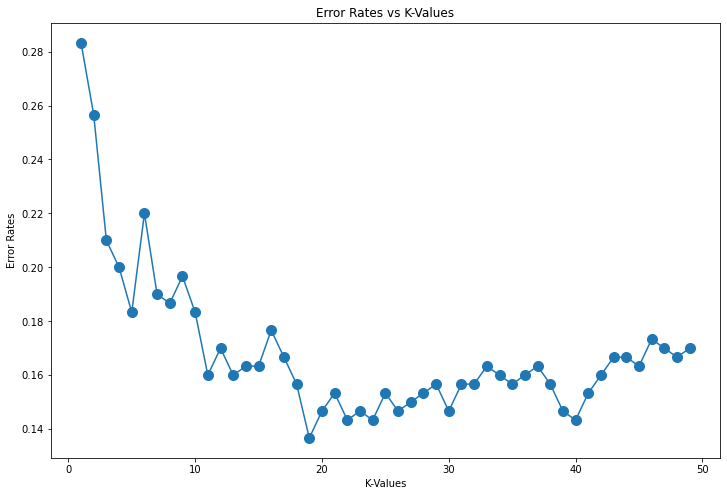

In [24]:
plt.figure(figsize=(12,8))
plt.plot(range(1,50), error_rate, marker='o', markersize=10)
plt.xlabel('K-Values')
plt.ylabel('Error Rates')
plt.title('Error Rates vs K-Values')

In [25]:
knn = KNeighborsClassifier(n_neighbors=19)

In [26]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=19)

In [27]:
y_preds = knn.predict(X_test)

In [28]:
confusion_matrix(y_test, y_preds)

array([[132,  26],
       [ 15, 127]], dtype=int64)

In [29]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.90      0.84      0.87       158
           1       0.83      0.89      0.86       142

    accuracy                           0.86       300
   macro avg       0.86      0.86      0.86       300
weighted avg       0.87      0.86      0.86       300



### Compare above classification report to the classification report when n_neighbour
### =1 and n_neighbour=19